In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor

In [2]:
train = pd.read_csv("desktop/pythonKaggle/train.csv")
test = pd.read_csv("desktop/pythonKaggle/test.csv")
target = train["SalePrice"]
combine = train.append(test).drop(["Id"], axis=1)
combine.head()

/Users/SexyChloe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [3]:
combine["MSSubClass"] = combine["MSSubClass"].astype(str)
treated = pd.get_dummies(combine).drop(["SalePrice"], axis=1)

In [4]:
for c in treated.columns:
    if treated[c].count() < 2919:
        treated[c]=treated[c].fillna(treated[c].mean())
preprocessing.scale(treated)

array([[-0.77386103,  1.20737855, -0.10333053, ...,  0.06424926,
         0.03207501, -0.01851217],
       [ 0.26107478, -0.78502504, -0.10333053, ...,  0.06424926,
         0.03207501, -0.01851217],
       [-0.61071844,  1.23537485, -0.10333053, ...,  0.06424926,
         0.03207501, -0.01851217],
       ...,
       [ 0.16420886, -0.78502504, -0.10333053, ...,  0.06424926,
         0.03207501, -0.01851217],
       [-0.48326329, -0.78502504, -0.10333053, ...,  0.06424926,
         0.03207501, -0.01851217],
       [-0.41698661,  1.55733234, -0.10333053, ...,  0.06424926,
         0.03207501, -0.01851217]])

/Users/SexyChloe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


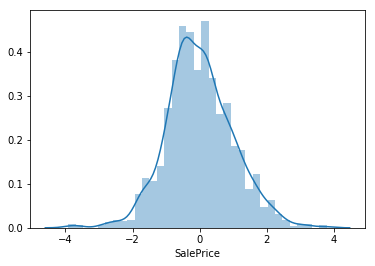

In [5]:
y = (np.log1p(target)-np.log1p(target).mean())/np.log1p(target).std()
sns.distplot(y)

In [6]:
nb = train.shape[0]
regr = BaggingRegressor(n_estimators=100)
regr.fit(treated[:nb], y)
preds = regr.predict(treated[nb:])
preds

array([-0.71231283, -0.19718751,  0.2025406 , ..., -0.12080876,
       -0.94721078,  0.80981949])

In [7]:
regr.score(treated[:nb], y)


0.9832243915584679

In [8]:
output = np.expm1(preds*np.log1p(target).std()+np.log1p(target).mean())
output

array([125431.68930139, 154088.82421003, 180765.62059306, ...,
       158862.46841545, 114197.64792891, 230391.39551487])

In [9]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": output
})

submission.to_csv('submission.csv', index=False)